In [3]:
# Colab setup for 01_eda

from google.colab import drive
drive.mount('/content/drive')

# create project folders in colab

!mkdir -p /content/cardio-ml-project/data
!mkdir -p /content/cardio-ml-project/notebooks
!mkdir -p /content/cardio-ml-project/src
!mkdir -p /content/cardio-ml-project/reports
!mkdir -p /content/cardio-ml-project/slides

# copy csv from drive folder to colab session folder
!cp /content/drive/MyDrive/cardio-ml-project/cardio_train.csv /content/cardio-ml-project/data/
!cp /content/drive/MyDrive/cardio-ml-project/diabetes_prediction_dataset.csv /content/cardio-ml-project/data/diabetes.csv

# verify datasets
import os
os.listdir("/content/cardio-ml-project/data")

Mounted at /content/drive


['diabetes.csv', 'cardio_train.csv']

In [4]:
# 01_eda.ipynb: Starter Notebook for Cardiovascular Disease Project

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#set plot style
sns.set_style("whitegrid")
%matplotlib inline

In [6]:
# load datasets

cardio = pd.read_csv("/content/cardio-ml-project/data/cardio_train.csv", sep=";")
diabetes = pd.read_csv("/content/cardio-ml-project/data/diabetes.csv")

In [7]:
# overview of datasets
print("Cardio dataset shape:", cardio.shape)
display(cardio.head())

print("\n Diabetes dataset shape:", diabetes.shape)
display(diabetes.head())

Cardio dataset shape: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0



 Diabetes dataset shape: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
# Basic Feature Engineering

# BMI for cardio dataset
cardio['bmi'] = cardio['weight'] / (cardio['height']/100)**2

# blood pressure difference
cardio['bp_diff'] = cardio['ap_hi'] - cardio['ap_lo']

# convert age from days to years
cardio['age_years'] = (cardio['age'] / 365).astype(int)

In [9]:
# check for missing values

print("Missing values in cardio dataset:\n", cardio.isnull().sum())
print("\n Missing values in diabetes dataset:\n", diabetes.isnull().sum())

Missing values in cardio dataset:
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
bp_diff        0
age_years      0
dtype: int64

 Missing values in diabetes dataset:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

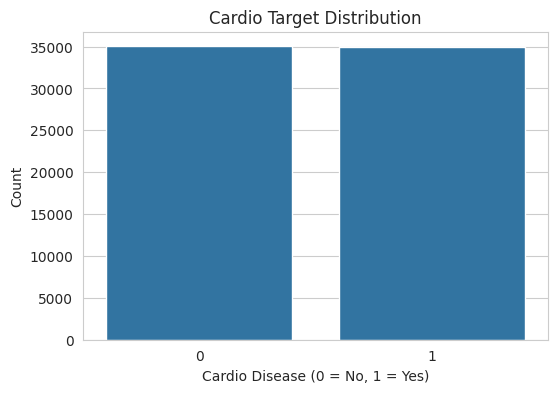

In [11]:
# Target distribution

plt.figure(figsize=(6,4))
sns.countplot(x='cardio', data=cardio)
plt.title("Cardio Target Distribution")
plt.xlabel("Cardio Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show

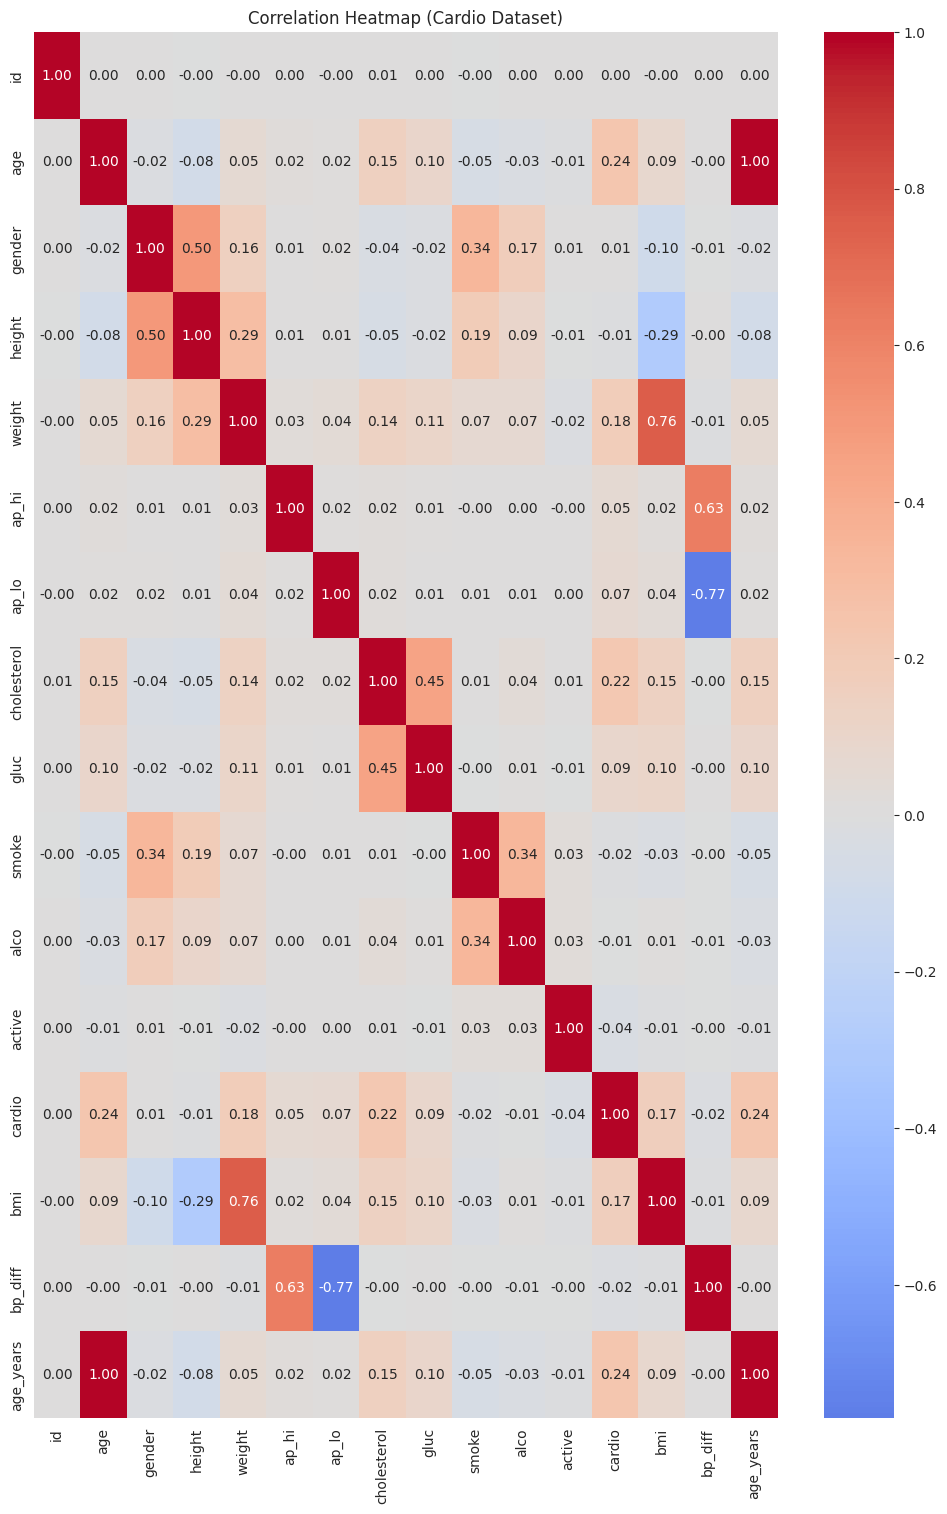

In [12]:
# Correlation Heatmap

plt.figure(figsize=(12,18))
sns.heatmap(cardio.corr(), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Cardio Dataset)")
plt.show()

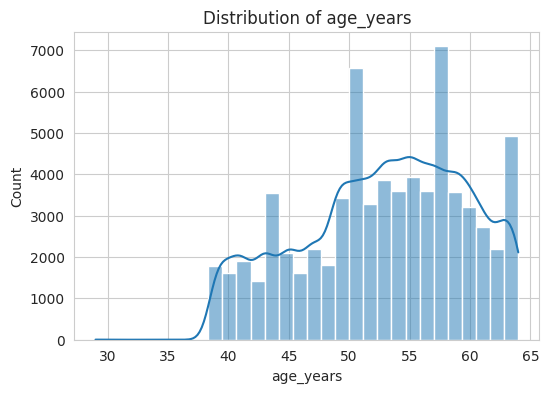

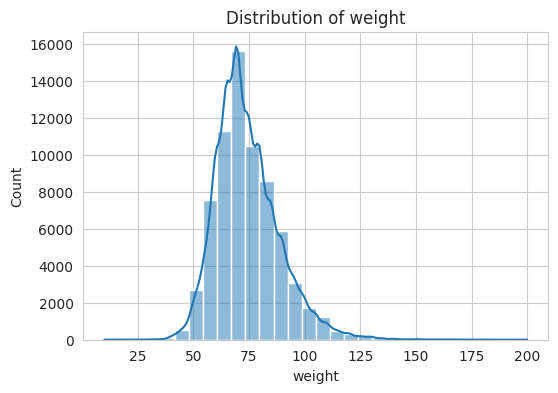

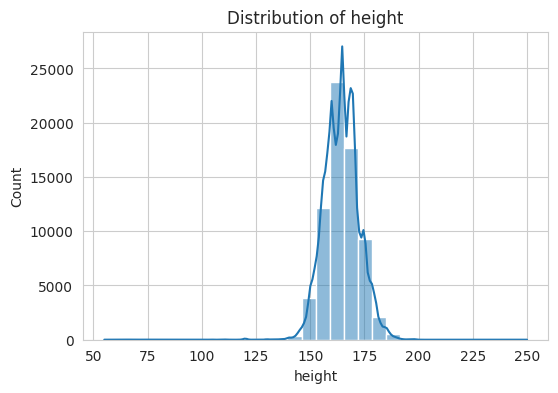

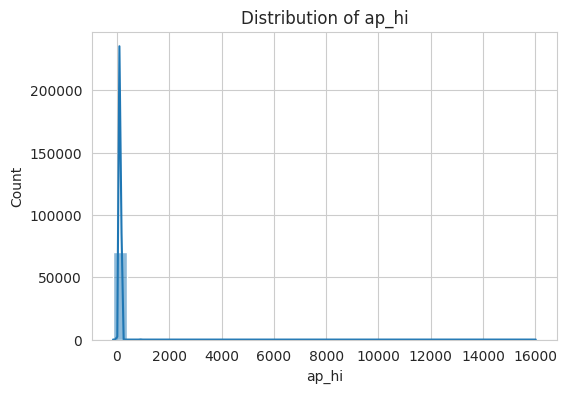

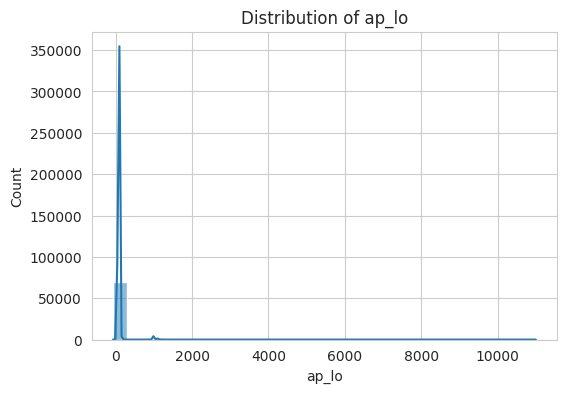

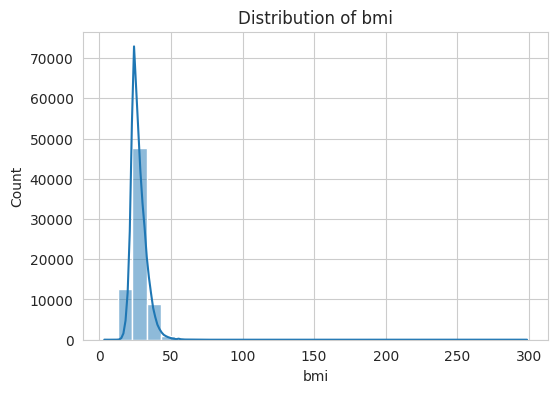

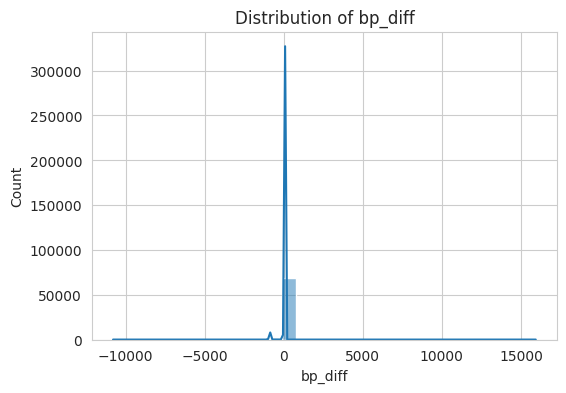

In [15]:
# Histograms for numeric features

numeric_cols = ['age_years', 'weight', 'height', 'ap_hi', 'ap_lo', 'bmi', 'bp_diff']
for col in numeric_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(cardio[col], kde=True, bins=30)
  plt.title(f"Distribution of {col}")
  plt.show()

In [16]:
# Summary statistics
display(cardio.describe())
display(diabetes.describe())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp_diff,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513,32.186871,52.840671
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511,241.469638,6.766774
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,-10800.000000,29.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,40.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068,40.000000,53.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222,50.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667,15940.000000,64.000000


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000
